In [ ]:
# 전처리
# • 토큰화
# • 품사부착
# • 개체명인식
# • 원형복원
# • 불용어처리

In [ ]:
# review.keys()
# -> (['오징어 게임', 'Jigeum Uri Hakgyoneun', '지옥', 'Binsenjo', 'Law School', 'Geu Hae Urineun', 'Seulgiroun Euisasaenghal', 'Twenty Five Twenty One', 'Itaewon Keullasseu', 'Seoreun Ahob', 'Sweet Home', '고요의 바다', 'Gyeongiroun Somun'])

**전체문장 한꺼번에 Sentence**

In [ ]:
review

In [6]:
imdb_keys = list(review.keys())

['오징어 게임', 'Jigeum Uri Hakgyoneun', 'Binsenjo']

In [7]:
squid_game = review[imdb_keys[0]][0] + review[imdb_keys[0]][2]
jigeum_uri_hakgyoneun = review[imdb_keys[1]][0] + review[imdb_keys[1]][2]
hell = review[imdb_keys[2]][0] + review[imdb_keys[2]][2]
binsenjo = review[imdb_keys[3]][0] + review[imdb_keys[3]][2]
law_school = review[imdb_keys[4]][0] + review[imdb_keys[4]][2]
geu_hae_urineun = review[imdb_keys[5]][0] + review[imdb_keys[5]][2]
seulgiroun_euisasaenghal = review[imdb_keys[6]][0] + review[imdb_keys[6]][2]
twenty_five_twenty_one = review[imdb_keys[7]][0] + review[imdb_keys[7]][2]
itaewon_keullasseu = review[imdb_keys[8]][0] + review[imdb_keys[8]][2]
seoreun_ahob = review[imdb_keys[9]][0] + review[imdb_keys[9]][2]
sweet_home = review[imdb_keys[10]][0] + review[imdb_keys[10]][2]
quiet_sea= review[imdb_keys[11]][0] + review[imdb_keys[11]][2]
gyeongiroun_somun= review[imdb_keys[12]][0] + review[imdb_keys[12]][2]

In [ ]:
total_sentences = squid_game + jigeum_uri_hakgyoneun + hell + binsenjo + law_school + geu_hae_urineun + seulgiroun_euisasaenghal + twenty_five_twenty_one + itaewon_keullasseu + seoreun_ahob + sweet_home + quiet_sea + gyeongiroun_somun

**장르별 Sentence**

In [ ]:
review

In [ ]:
imdb_keys = list(review.keys())

In [ ]:
action_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'action':
        action_list.append(review[imdb_keys[i]][0])
        action_list.append(review[imdb_keys[i]][2])

In [ ]:
action_sentence = sum(action_list, [])

In [ ]:
fantasy_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'fantasy':
        fantasy_list.append(review[imdb_keys[i]][0])
        fantasy_list.append(review[imdb_keys[i]][2])

In [ ]:
fantasy_sentence = sum(fantasy_list, [])

In [ ]:
crime_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'crime':
        crime_list.append(review[imdb_keys[i]][0])
        crime_list.append(review[imdb_keys[i]][2])

In [ ]:
crime_sentence = sum(crime_list, [])

In [ ]:
comedy_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'comedy':
        comedy_list.append(review[imdb_keys[i]][0])
        comedy_list.append(review[imdb_keys[i]][2])

In [ ]:
comedy_sentence = sum(comedy_list, [])

In [ ]:
romance_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'romance':
        romance_list.append(review[imdb_keys[i]][0])
        romance_list.append(review[imdb_keys[i]][2])

In [ ]:
romance_sentence = sum(romance_list, [])

In [ ]:
SF_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'SF':
        SF_list.append(review[imdb_keys[i]][0])
        SF_list.append(review[imdb_keys[i]][2])

In [ ]:
SF_sentence = sum(SF_list, [])

In [ ]:
horror_list = []
for i in range(len(imdb_keys)):
    if review[imdb_keys[i]][3] == 'horror':
        horror_list.append(review[imdb_keys[i]][0])
        horror_list.append(review[imdb_keys[i]][2])

In [ ]:
horror_sentence = sum(horror_list, [])

In [12]:
import re
import pandas as pd
import numpy as np
import string
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

**토큰화**(단어 토큰화) - 
케라스가 제공하는 text 모듈의 text_to_word_sequence( ) 함수를 사용해 문장을 단어 단위로 나눈 후 소문자로 바꾸고 구두점(콤마, 마침표 등)을 없애주면서 어퍼스트로피(')는 보존해 쉽게 나눌 수 있다.

In [30]:
#sentence에 리스트로 된 리뷰 입력
sentence = ["Don't be fooled by the dark sound…ing name", "Mr. Jone's Orphanage is as cheery ※as cheery goes for a pastry shop.", "』she looks so beautiful", "I am go to school", "cherry pie was dealicious", "Jone's looks beautiful", "beautiful beautiful", 'pastry shop looks so good']

sentence = ",".join(sentence)
Words = text_to_word_sequence(sentence)
print(Words)

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sound…ing', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', '※as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '』she', 'looks', 'so', 'beautiful', 'i', 'am', 'go', 'to', 'school', 'cherry', 'pie', 'was', 'dealicious', "jone's", 'looks', 'beautiful', 'beautiful', 'beautiful', 'pastry', 'shop', 'looks', 'so', 'good']


In [31]:
#영어와 숫자를 뺀 나머지 모두 제거
words = []

for i in Words:
    text = re.sub('[^a-zA-Z0-9\']','',i).strip()
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》]','', text)
    if(text != ''):
        words.append(text)
words

["don't",
 'be',
 'fooled',
 'by',
 'the',
 'dark',
 'sounding',
 'name',
 'mr',
 "jone's",
 'orphanage',
 'is',
 'as',
 'cheery',
 'as',
 'cheery',
 'goes',
 'for',
 'a',
 'pastry',
 'shop',
 'she',
 'looks',
 'so',
 'beautiful',
 'i',
 'am',
 'go',
 'to',
 'school',
 'cherry',
 'pie',
 'was',
 'dealicious',
 "jone's",
 'looks',
 'beautiful',
 'beautiful',
 'beautiful',
 'pastry',
 'shop',
 'looks',
 'so',
 'good']

In [32]:
en = nltk.Text(words)
print(len(en.tokens)) #number of tokens
print(len(set(en.tokens))) #number of unique tokens
en.vocab()

44
33


FreqDist({'a': 1,
          'am': 1,
          'as': 2,
          'be': 1,
          'beautiful': 4,
          'by': 1,
          'cheery': 2,
          'cherry': 1,
          'dark': 1,
          'dealicious': 1,
          "don't": 1,
          'fooled': 1,
          'for': 1,
          'go': 1,
          'goes': 1,
          'good': 1,
          'i': 1,
          'is': 1,
          "jone's": 2,
          'looks': 3,
          'mr': 1,
          'name': 1,
          'orphanage': 1,
          'pastry': 2,
          'pie': 1,
          'school': 1,
          'she': 1,
          'shop': 2,
          'so': 2,
          'sounding': 1,
          'the': 1,
          'to': 1,
          'was': 1})

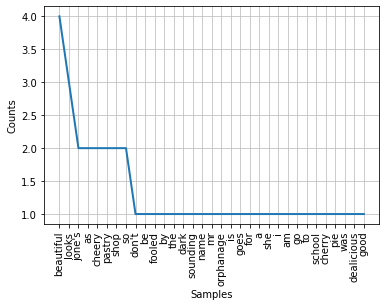

In [33]:
en.plot(50)     # top 50 tokens의 빈도순

**품사태깅**(동사, 형용사, 명사, 부사 추출)

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [34]:
tag_words = nltk.pos_tag(words)
tag_words

[("don't", 'NN'),
 ('be', 'VB'),
 ('fooled', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('dark', 'NN'),
 ('sounding', 'VBG'),
 ('name', 'NN'),
 ('mr', 'FW'),
 ("jone's", 'NN'),
 ('orphanage', 'NN'),
 ('is', 'VBZ'),
 ('as', 'RB'),
 ('cheery', 'JJ'),
 ('as', 'IN'),
 ('cheery', 'NN'),
 ('goes', 'VBZ'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('pastry', 'NN'),
 ('shop', 'NN'),
 ('she', 'PRP'),
 ('looks', 'VBZ'),
 ('so', 'RB'),
 ('beautiful', 'JJ'),
 ('i', 'NN'),
 ('am', 'VBP'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('school', 'NN'),
 ('cherry', 'NN'),
 ('pie', 'NN'),
 ('was', 'VBD'),
 ('dealicious', 'JJ'),
 ("jone's", 'NN'),
 ('looks', 'VBZ'),
 ('beautiful', 'JJ'),
 ('beautiful', 'JJ'),
 ('beautiful', 'JJ'),
 ('pastry', 'NN'),
 ('shop', 'NN'),
 ('looks', 'VBZ'),
 ('so', 'RB'),
 ('good', 'JJ')]

In [35]:
#동사, 명사, 형용사, 부사를 제외한 나머지 품사 제거
pos_words = []
for word in tag_words:
    if word[1].startswith('V'):
        pos_words.append(word)
    elif word[1].startswith('N'):
        pos_words.append(word)
    elif word[1].startswith('J'):
        pos_words.append(word)
    elif word[1].startswith('R'):
        pos_words.append(word)

print(pos_words)

[("don't", 'NN'), ('be', 'VB'), ('fooled', 'VBN'), ('dark', 'NN'), ('sounding', 'VBG'), ('name', 'NN'), ("jone's", 'NN'), ('orphanage', 'NN'), ('is', 'VBZ'), ('as', 'RB'), ('cheery', 'JJ'), ('cheery', 'NN'), ('goes', 'VBZ'), ('pastry', 'NN'), ('shop', 'NN'), ('looks', 'VBZ'), ('so', 'RB'), ('beautiful', 'JJ'), ('i', 'NN'), ('am', 'VBP'), ('go', 'VB'), ('school', 'NN'), ('cherry', 'NN'), ('pie', 'NN'), ('was', 'VBD'), ('dealicious', 'JJ'), ("jone's", 'NN'), ('looks', 'VBZ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('pastry', 'NN'), ('shop', 'NN'), ('looks', 'VBZ'), ('so', 'RB'), ('good', 'JJ')]


**원형복원**

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('V'):
        return 'v'
    elif pos_tag.startswith('N'):
        return 'n'
    elif pos_tag.startswith('J'):
        return 'a'
    elif pos_tag.startswith('R'):
        return 'r'
    else:
        return None

temp_list = []
for token, pos_tag in pos_words:
    tag = get_wordnet_pos(pos_tag)
    if tag != None:
        temp_list.append((token, get_wordnet_pos(pos_tag)))
temp_list

[("don't", 'n'),
 ('be', 'v'),
 ('fooled', 'v'),
 ('dark', 'n'),
 ('sounding', 'v'),
 ('name', 'n'),
 ("jone's", 'n'),
 ('orphanage', 'n'),
 ('is', 'v'),
 ('as', 'r'),
 ('cheery', 'a'),
 ('cheery', 'n'),
 ('goes', 'v'),
 ('pastry', 'n'),
 ('shop', 'n'),
 ('looks', 'v'),
 ('so', 'r'),
 ('beautiful', 'a'),
 ('i', 'n'),
 ('am', 'v'),
 ('go', 'v'),
 ('school', 'n'),
 ('cherry', 'n'),
 ('pie', 'n'),
 ('was', 'v'),
 ('dealicious', 'a'),
 ("jone's", 'n'),
 ('looks', 'v'),
 ('beautiful', 'a'),
 ('beautiful', 'a'),
 ('beautiful', 'a'),
 ('pastry', 'n'),
 ('shop', 'n'),
 ('looks', 'v'),
 ('so', 'r'),
 ('good', 'a')]

In [39]:
#추출한 품사의 단어를 원형으로 복원
lemma = WordNetLemmatizer()
token_final = []
for token, tag in temp_list:
    token_final.append(lemma.lemmatize(token, pos=tag))
token_final

["don't",
 'be',
 'fool',
 'dark',
 'sound',
 'name',
 "jone's",
 'orphanage',
 'be',
 'as',
 'cheery',
 'cheery',
 'go',
 'pastry',
 'shop',
 'look',
 'so',
 'beautiful',
 'i',
 'be',
 'go',
 'school',
 'cherry',
 'pie',
 'be',
 'dealicious',
 "jone's",
 'look',
 'beautiful',
 'beautiful',
 'beautiful',
 'pastry',
 'shop',
 'look',
 'so',
 'good']

**불용어처리**

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
#2글자 이하의 단어 제거
long_words = []
for i in token_final:
    if len(i) > 2:
        long_words.append(i)
long_words

["don't",
 'fool',
 'dark',
 'sound',
 'name',
 "jone's",
 'orphanage',
 'cheery',
 'cheery',
 'pastry',
 'shop',
 'look',
 'beautiful',
 'school',
 'cherry',
 'pie',
 'dealicious',
 "jone's",
 'look',
 'beautiful',
 'beautiful',
 'beautiful',
 'pastry',
 'shop',
 'look',
 'good']

In [131]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

results = []
for w in long_words:
    if w not in stop_words:
        results.append(w)
results

['fool',
 'dark',
 'sound',
 'name',
 "jone's",
 'orphanage',
 'cheery',
 'cheery',
 'pastry',
 'shop',
 'look',
 'beautiful',
 'school',
 'cherry',
 'pie',
 'dealicious',
 "jone's",
 'look',
 'beautiful',
 'beautiful',
 'beautiful',
 'pastry',
 'shop',
 'look',
 'good']

In [116]:
#Counter를 이용해 빈도 확인 - 결과 확인용
vocab = Counter()
for w in rm_words:
    vocab[w] = vocab[w] + 1
print(vocab)
print(list(vocab.elements()))

Counter({'beautiful': 4, 'look': 3, "jone's": 2, 'cheery': 2, 'pastry': 2, 'shop': 2, 'fool': 1, 'dark': 1, 'sound': 1, 'name': 1, 'orphanage': 1, 'school': 1, 'cherry': 1, 'pie': 1, 'dealicious': 1, 'good': 1})
['fool', 'dark', 'sound', 'name', "jone's", "jone's", 'orphanage', 'cheery', 'cheery', 'pastry', 'pastry', 'shop', 'shop', 'look', 'look', 'look', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'school', 'cherry', 'pie', 'dealicious', 'good']


In [122]:
vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
vocab_sorted

[('beautiful', 4),
 ('look', 3),
 ("jone's", 2),
 ('cheery', 2),
 ('pastry', 2),
 ('shop', 2),
 ('fool', 1),
 ('dark', 1),
 ('sound', 1),
 ('name', 1),
 ('orphanage', 1),
 ('school', 1),
 ('cherry', 1),
 ('pie', 1),
 ('dealicious', 1),
 ('good', 1)]

In [ ]:
# text = ["Hello world! nice to meet you! python is nice language!", "Don't tell me!"]
# punct = string.punctuation
# punct
# from spacy.lang.en.stop_words import STOP_WORDS
# stopwords = list(STOP_WORDS)
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def text_data_cleaning(sentence):
#     doc = nlp(sentence)

#     tokens = []
#     for token in doc:
#         if token.lemma_ != "-PRON-":
#             temp = token.lemma_.lower().strip()
#         else:
#             temp = token.lower_
#         tokens.append(temp)

#     cleaned_tokens = []
#     for token in tokens:
#         if token not in stopwords and token not in punct:
#             cleaned_tokens.append(token)
#     return cleaned_tokens